# Prosper Loan Data Exploration
## by (Marwa Qabeel)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing) explains the variables in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Set the grid for the output coulmns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**The next lines of code to adjust the style of the output tables in my notebook to have outlined edges →→→ Ignore it**

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

Let's load the dataset and do some initial wrangling:

In [4]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

In [5]:
# Explore the dataframe size
loan_df.shape

(113937, 81)

In [6]:
# Check data types of the dataset fields
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
# Explore the first few rows
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [8]:
# check for duplicates in the dataset
sum(loan_df.duplicated())

0

In [9]:
#Check for number and percentage of Nulls

# Getting the number of missing values in each column
num_missing = loan_df.isna().sum()

# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]

# Getting the percentages of missing values and round down the result 
percent_missing = num_missing * 100 / loan_df.shape[0]
percent_missing = percent_missing.round(2) 

# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it 
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
GroupKey,100596,88.29
LoanFirstDefaultedCycleNumber,96985,85.12
ScorexChangeAtTimeOfListing,95009,83.39
ProsperPrincipalOutstanding,91852,80.62
ProsperPrincipalBorrowed,91852,80.62
ProsperPaymentsOneMonthPlusLate,91852,80.62
ProsperPaymentsLessThanOneMonthLate,91852,80.62
OnTimeProsperPayments,91852,80.62
TotalProsperPaymentsBilled,91852,80.62
TotalProsperLoans,91852,80.62


It seems that there are a lot of nulls for most of the variables in the dataset since I'm only interested to investigate some of the features from this dataset, I will subset the dataframe to extract the features of interest for my analysis and remove the nulls for this subset dataframe only:

In [10]:
# extract the features of interest 
sub_data =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

# adjust the datframe
loan_subdata = loan_df[sub_data]

In [11]:
# explore a sample of the sub dataframe
loan_subdata.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
69269,60,Current,0.2506,D,1,Employed,0.0,4895.833333,NaN,10000,2013-05-29 00:00:00,0,1
921,36,Past Due (16-30 days),0.3177,HR,1,Other,18.0,1666.666667,NaN,4000,2012-08-09 00:00:00,0,78
48995,60,Current,0.1940,C,1,Employed,0.0,4041.666667,NaN,15000,2013-12-17 00:00:00,0,1
109056,60,Current,0.1695,C,1,Employed,1.0,5250.000000,NaN,15000,2013-11-14 00:00:00,0,1
104300,36,Chargedoff,0.2599,D,1,Employed,0.0,6250.000000,NaN,13000,2011-05-11 00:00:00,0,99


In [12]:
# Check the size of the sub data
loan_subdata.shape

(113937, 13)

In [13]:
# Let's check number of null values for the subset data 
missing_values = loan_subdata.isnull().sum()

# sort the data 
missing_values.sort_values(ascending=False)

TotalProsperLoans            91852
ProsperRating (Alpha)        29084
EmploymentStatus              2255
DelinquenciesLast7Years        990
Investors                        0
Recommendations                  0
LoanOriginationDate              0
LoanOriginalAmount               0
StatedMonthlyIncome              0
ListingCategory (numeric)        0
BorrowerRate                     0
LoanStatus                       0
Term                             0
dtype: int64

Since Prosper use their own proprietary Prosper Rating only since 2009, we have a lot of missing values in `ProsperRating (Alpha)` column, Let's drop these missing values:

In [14]:
# dropping the Nulls from 'ProsperRating (Alpha)'
loan_subdata = loan_subdata.dropna(subset=['ProsperRating (Alpha)']).reset_index()

Now, let's convert `LoanOriginationDate` to datetime datatype:

In [15]:
# Changing the data type of 'LoanOriginationDate' to datetime
loan_subdata['LoanOriginationDate'] = pd.to_datetime(loan_subdata['LoanOriginationDate'])

In [16]:
# Let's check if there are any nulls left
loan_subdata.isnull().sum().sort_values(ascending=False)

TotalProsperLoans            65056
Investors                        0
Recommendations                  0
LoanOriginationDate              0
LoanOriginalAmount               0
StatedMonthlyIncome              0
DelinquenciesLast7Years          0
EmploymentStatus                 0
ListingCategory (numeric)        0
ProsperRating (Alpha)            0
BorrowerRate                     0
LoanStatus                       0
Term                             0
index                            0
dtype: int64

According to [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) in case of no previous credit history on Prosper the value for column `TotalProsperLoans` will be NaN, let's replace it with 0:

In [17]:
# Replace 'TotalProsperLoans' Nulls with 0
loan_subdata['TotalProsperLoans'] = loan_subdata['TotalProsperLoans'].fillna(0)

In [18]:
# confirm that there's no Nulls left for the sub dataset
loan_subdata.isna().values.sum()

0

### Descriptive Statistics

Before starting with the explanatory analysis, I will check the summary statistics for the numerical and categorical features for the subset dataframe:


- #### Statistics for the Numerical varibles:

In [19]:
# Get the summary statiscircs for the numeric values 
# exluding 'count' here, as we aleardy know the total count for each varible

loan_subdata.describe().transpose()\
    .drop("index", axis=0)

,count,mean,std,min,25%,50%,75%,max
Term,84853.0,42.486135,11.640346,12.00,36.0000,36.0000,60.000000,6.000000e+01
BorrowerRate,84853.0,0.196022,0.074631,0.04,0.1359,0.1875,0.257400,3.600000e-01
ListingCategory (numeric),84853.0,3.312647,4.364277,0.00,1.0000,1.0000,3.000000,2.000000e+01
DelinquenciesLast7Years,84853.0,3.659435,9.347957,0.00,0.0000,0.0000,2.000000,9.900000e+01
StatedMonthlyIncome,84853.0,5931.174803,8239.943740,0.00,3434.0000,5000.0000,7083.333333,1.750003e+06
TotalProsperLoans,84853.0,0.340789,0.726235,0.00,0.0000,0.0000,0.000000,8.000000e+00
LoanOriginalAmount,84853.0,9083.440515,6287.860058,1000.00,4000.0000,7500.0000,13500.000000,3.500000e+04
Recommendations,84853.0,0.017560,0.187963,0.00,0.0000,0.0000,0.000000,1.900000e+01
Investors,84853.0,68.264669,95.195831,1.00,1.0000,32.0000,97.000000,1.189000e+03


- #### Statistics for the categorical variables

I will use describe function and to select the non-numerical columns, I will use `np.object`

In [20]:
# Get the summary statiscircs for the non-numeric columns
# exluding 'count' here, as we aleardy know the total count for each varible

loan_subdata.describe(include=[np.object]).transpose() \
    .drop("count", axis=1)

,unique,top,freq
LoanStatus,11,Current,56576
ProsperRating (Alpha),7,C,18345
EmploymentStatus,7,Employed,67310


### What is the structure of your dataset?

After initial cleaning there are 84853 (down from 113937) listings for loan via peer-to-peer credit company Prosper. They are: **`LoanStatus`, `BorrowerRate`, `ProsperRating (Alpha)`, `ListingCategory (numeric)`, `EmploymentStatus`, `DelinquenciesLast7Years`, `StatedMonthlyIncome`, `TotalProsperLoans`, `LoanOriginalAmount`, `LoanOriginationDate`, `Recommendations`, `Investors`**. Most of the variables are numeric however there are some non-numeric (categorical) varibles:

- LoanStatus - categorical variable
- ProsperRating (Aplha) ordinal categorical variable with the following values from higher to lower ('AA', 'A', 'B', 'C', 'D', 'E', 'HR')
- EmploymentStatus - categorical variable
- ListingCategory (numeric) - a numeric code for category of credit (will explored in detail below).
- LoanOriginationDate - datetime object

### What is/are the main feature(s) of interest in your dataset?

I will try to figure out what features can be used to predict default on credit. Also i would like to check what are major factors connected with prosper credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the borrowers Prosper rating will have the highest impact on chances of default. Also I expect that loan amount will play a major role and maybe the category of credit. Prosper rating will depend on stated income and employment status.

## Univariate Exploration

In [21]:
# setting color
default_color = sb.color_palette()[4]

First let's take a look at `Term` variable using a Count Plot:

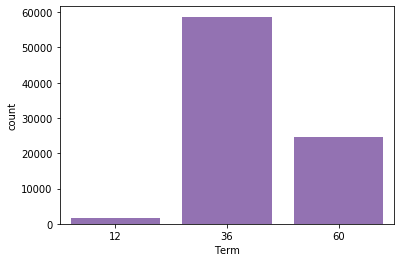

In [22]:
# Visulizing the time periods for loans
sb.countplot(data = loan_subdata, x = 'Term', color = default_color);

For `Term`: the loans time periods, there are three options: 36, 60 and 12 months. the most common trem for the loans in the dataset is 36 months. Next, let's check `LoanStatus`:

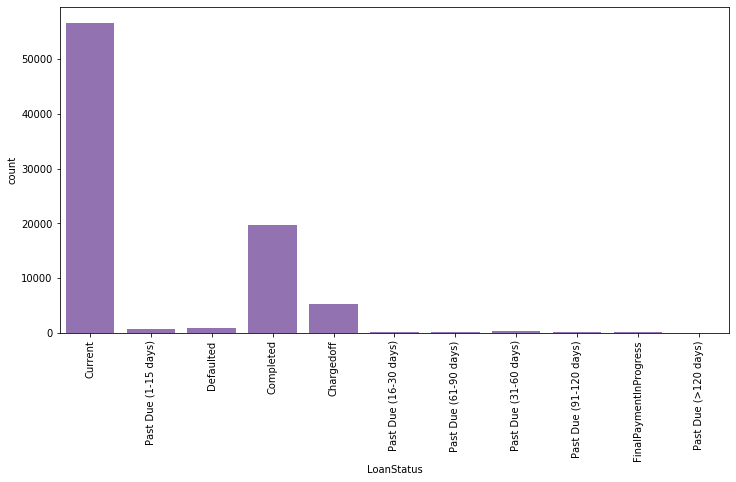

In [23]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=90)
sb.countplot(data = loan_subdata, x = 'LoanStatus', color = default_color);

Most of the loans in the dataset are actually **Current** loans. Following it with a big frequency the **Completed** loans, followed by  **Chargedoff**, while **Defaulted** and **Past due** categories loans represent a minority. 
Up next - `BorrowerRate`:

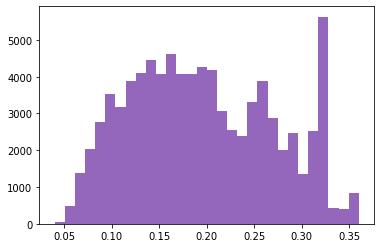

In [24]:
plt.hist(data=loan_subdata, x='BorrowerRate', bins=30, color = default_color);

The distribution of the `BorrowerRate` appears to be bimodal with first peak around 0.16, larger peak (true mode) around 0.32. Let's check number of occurrences:

In [25]:
# Check the frequency of the top 2 peaks
loan_subdata.BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3199    1645
Name: BorrowerRate, dtype: int64

Turns out two most common rates are 0.3177 and 0.3199. Let's check `ProsperRating (Alpha)` next:

Because `ProsperRating (Alpha)` is ordinal categorial variable (From the highest rating A to the lowest HR) We need to convert it using pandas:

In [26]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']


ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_list)
loan_subdata['ProsperRating (Alpha)'] = loan_subdata['ProsperRating (Alpha)'].astype(ordered_var)

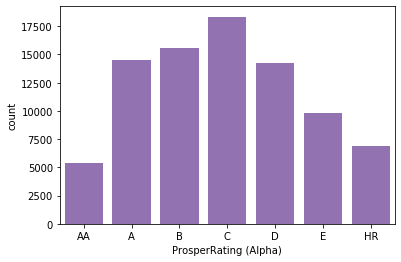

In [27]:
sb.countplot(data=loan_subdata, x='ProsperRating (Alpha)', color=default_color);

Interestingly enough ratings are almost normally distributed with the highest AA rating and the lowest rating HR are the least common and average rating C being the most common. Now let's see about purpose of the loan through `ListingCategory (numeric)`:

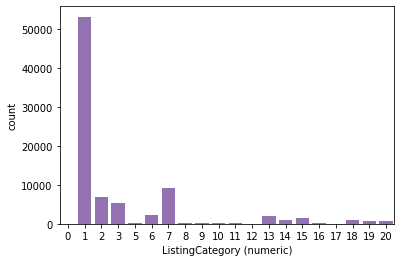

In [28]:
sb.countplot(data=loan_subdata, x='ListingCategory (numeric)', color=default_color);

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

The vast majority of loans are used for debt consolidation. Other notable categories include Other, Auto, Home Improvement and Business. Next variable - `EmploymentStatus`:

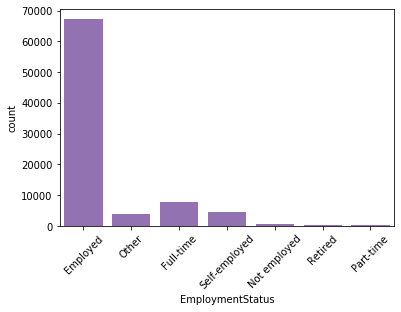

In [29]:
sb.countplot(data=loan_subdata, x='EmploymentStatus', color=default_color)
plt.xticks(rotation=45);

The majority of borrowers are **Employed** all other categories constitute only small numbers of the borrowers. Let's move to the `DelinquenciesLast7Years` variable:

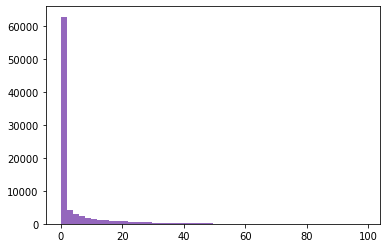

In [30]:
plt.hist(data=loan_subdata, x='DelinquenciesLast7Years', bins=50, color=default_color);

Most of the Prosper clients have **0** delinquencies for the last 7 years, a small minority has up to **20** delinquencies and very tiny group had more than 20 but less than 100 delinquencies. Next let's take a look at `StatedMonthlyIncome`:

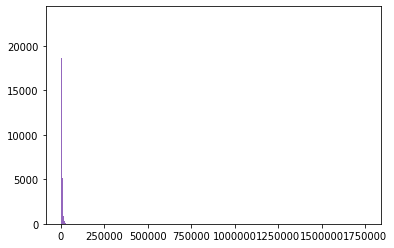

In [31]:
plt.hist(data=loan_subdata, x='StatedMonthlyIncome', bins=1000, color=default_color);

Distribution of stated monthly income is highly skewed to the right. Let's check the outliers of the loan data:

In [32]:
# If a data point is far from the mean by more than 3 standard deviations it will be considered an outlier
income_std = loan_subdata['StatedMonthlyIncome'].std()
income_mean = loan_subdata['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(loan_subdata[loan_subdata['StatedMonthlyIncome'] >= boundary])

245

Let's take a close look at the `StatedMonthlyIncome`:

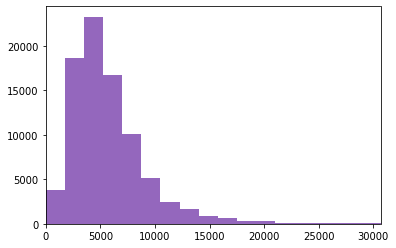

In [33]:
# This time limit x scale by boundary
plt.hist(data=loan_subdata, x='StatedMonthlyIncome', bins=1000, color=default_color);
plt.xlim(0, boundary);

With a boundary of mean + three standard deviations, the distribution of the monthly income still has noticeable right skew but now we can see that mode is about 5,000. Next step – `TotalProsperLoans`:

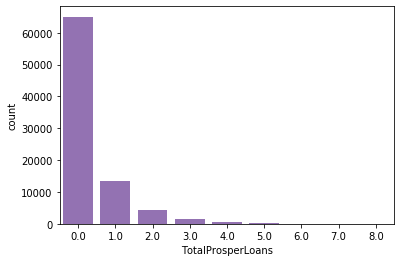

In [34]:
sb.countplot(data=loan_subdata, x='TotalProsperLoans', color=default_color);

For the most clients this is their first loan at prosper, small minority of clients already borrowed 1, 2 or 3 loans, the maximum is 8 loans. Next step - `LoanOriginalAmount`:

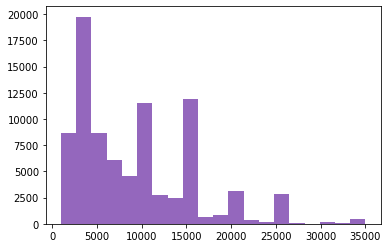

In [35]:
plt.hist(data=loan_subdata, x='LoanOriginalAmount', bins=20, color=default_color);

It looks like most of the loans are below 15,000 range and people often borrow in increments of 5 thousands i.e. 5000, 10000, 15000, 20000 etc. Let's move on to `LoanOriginationDate`:

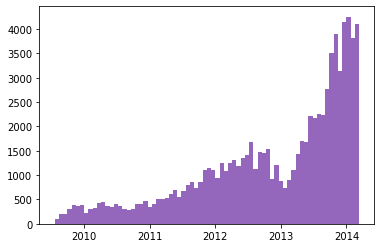

In [36]:
plt.hist(data=loan_subdata, x='LoanOriginationDate', bins=72, color=default_color);

In [37]:
loan_subdata['LoanOriginationDate'].describe()

count                   84853
unique                   1165
top       2014-01-22 00:00:00
freq                      491
first     2009-07-20 00:00:00
last      2014-03-12 00:00:00
Name: LoanOriginationDate, dtype: object

Data points are form **2009-07-20** till **2014-02-21**. We can clearly see a substansial growth for the number of loans from the start of 2013. Next item - `Recommendations`:

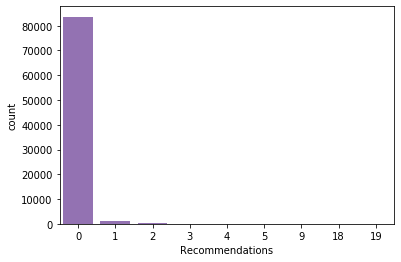

In [38]:
sb.countplot(data=loan_subdata, x='Recommendations', color=default_color);

The vast majority of loans obtained without recomendations. Next let's dig into `Investors`:

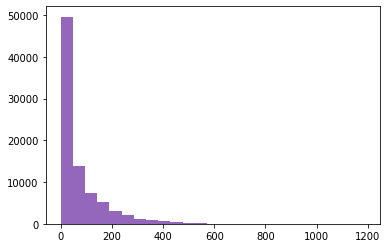

In [39]:
plt.hist(data=loan_subdata, x='Investors', bins=25, color=default_color);

Most loans have only one investor and majority less than 200 investors but some have about 1200 investors.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Prosper ratings are almost normally distributed. Distribution of monthly stated income is very awkward: with a lot of outliers and a very large range of values, because this is evidently based on borrowers' self-reporting, I think there is a lot of wrong values, we will wrangle with it bellow. I did not feel like any scale transformations can be useful here. Most loans are below 15,000, it seems like most loans are increments of 5,000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans (and loans with a specified past due period) also chargedoff loans can be considered as defaulted. We will make some adjustments to the data in the next step:

In [40]:
# Check the number of each value in the 'LoanStatus'
loan_subdata['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [41]:
# leaving only completed chargedoff or defaulted listings
condition = (loan_subdata['LoanStatus'] == 'Completed') | (loan_subdata['LoanStatus'] == 'Defaulted') | (loan_subdata['LoanStatus'] == 'Chargedoff')
loan_subdata = loan_subdata[condition]

In [42]:
# setting chargedoff as defaulted
def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']

In [43]:
loan_subdata['LoanStatus'] = loan_subdata.apply(change_to_defaulted, axis=1)

In [44]:
#Check the values counts again
loan_subdata['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

After transforming dataset we have 19664 Completed loans and 6341 Defaulted.

`ListingCategory (numeric)` is set up as numeric and most of the values have very low frequency, for the easier visualization let's change it to categorical and reduce the number of categories:

In [45]:
# helper function:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]

In [46]:
loan_subdata['ListingCategory (numeric)'] = loan_subdata.apply(reduce_categories, axis=1)

In [47]:
loan_subdata['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

We also need to remove the outliers from `StatedMonthlyIncome`, we can presume that this is self-reporting parameter and the outliers are simply errors made by borrowers most likely monthly income is mistaken for annual income.

In [48]:
# eliminate the outliers
loan_subdata = loan_subdata[loan_subdata['StatedMonthlyIncome'] < boundary]

## Bivariate Exploration

Let's start with the pair-wise correlation between all numeric variables:

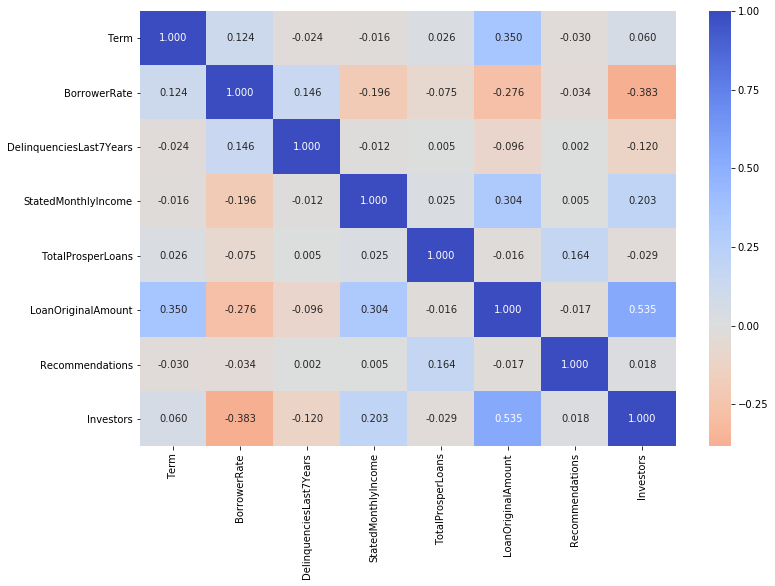

In [49]:
# extract the numerical varibles
numeric_vars = ['Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
                'TotalProsperLoans', 'LoanOriginalAmount', 'Recommendations', 'Investors'
               ]
# settings of the heatmap
plt.figure(figsize = [12, 8])
ax = sb.heatmap(loan_subdata[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'coolwarm_r', center = 0)

# adjust the cutted edges of the heatmap
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

- Interestingly there is no strong correlation between variables in this dataset. 


- There is some moderate positive correlation between `LoanOriginalAmount` and `Term`, `LoanOriginalAmount` and number of 
`Investors`, `LoanOriginalAmount` and `StatedMonthlyIncome`, `Recommendations` and `TotalProsperLoans`, number of delinquencies and borrowers rate. 


- There is also moderate negative correlation between loan amount and borrower rate and number of investors and borrower rate. 


Let's move to the categorical features:

<Figure size 720x720 with 0 Axes>

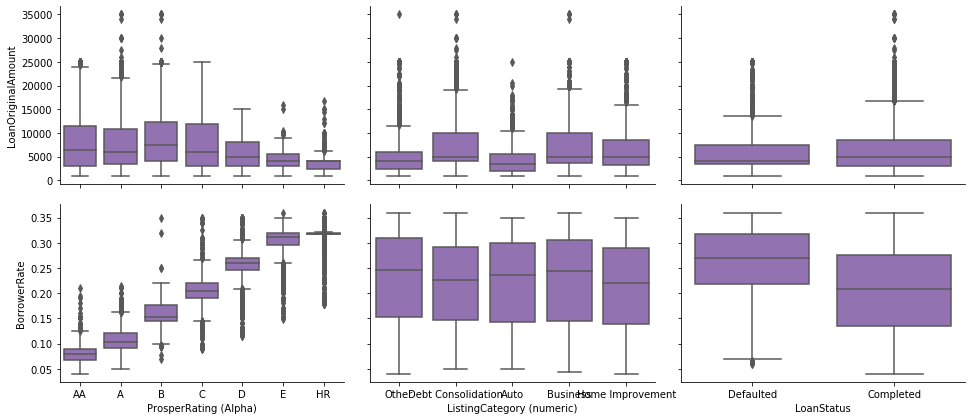

In [50]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerRate']
categoric_vars = ['ProsperRating (Alpha)', 'ListingCategory (numeric)', 'LoanStatus']


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_subdata, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid);
plt.show();

Borrowers with lower rating in general receive lower loan amount and higher interest rate. Amounts borrowed for 'other' and 'auto' purposes are usually lower than other categories, the rate does not fluctuate much between various purposes of loans. Defaulted loans tend to be somewhat smaller than Completed. Borrower Rate for defaulted loans is considerably higher than for the completed but this is due to clients with lower rating get higher interest rate. 


Let's check what can influence an outcome of credit starting with Listing Category:

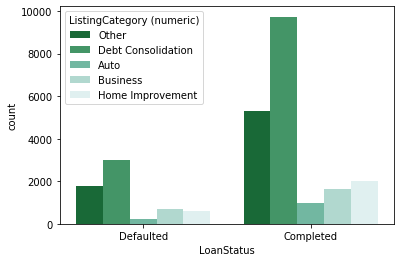

In [51]:
sb.countplot(data=loan_subdata, x='LoanStatus', hue='ListingCategory (numeric)', palette='BuGn_r');

Visually we can see that proportion of defaulted loans is higer for business and home improvement category than for other or debt consolidation category. Next loan status and Prosper rating:

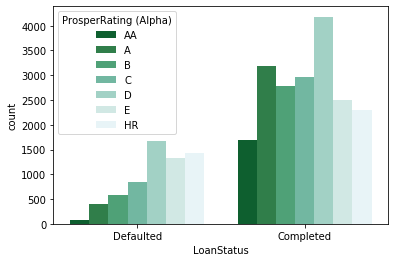

In [52]:
sb.countplot(data=loan_subdata, x='LoanStatus', hue='ProsperRating (Alpha)', palette='BuGn_r');

That is actually quite interesting: The most frequent rating among defaulted loans is actually <b>D</b>, this is contrary to the common logic - most common rating for defaulted debts should be <b>HR</b>. Let's see how loan status and investors are connected:

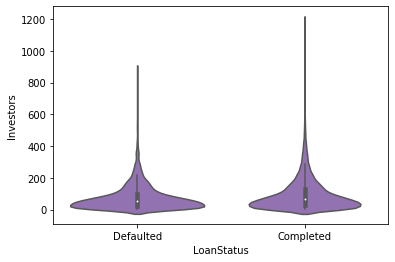

In [53]:
sb.violinplot(data = loan_subdata, x = 'LoanStatus', y = 'Investors', color = default_color);

Defaulted credits usually have fewer investors. Next let’s see connection between employment status and loan status.

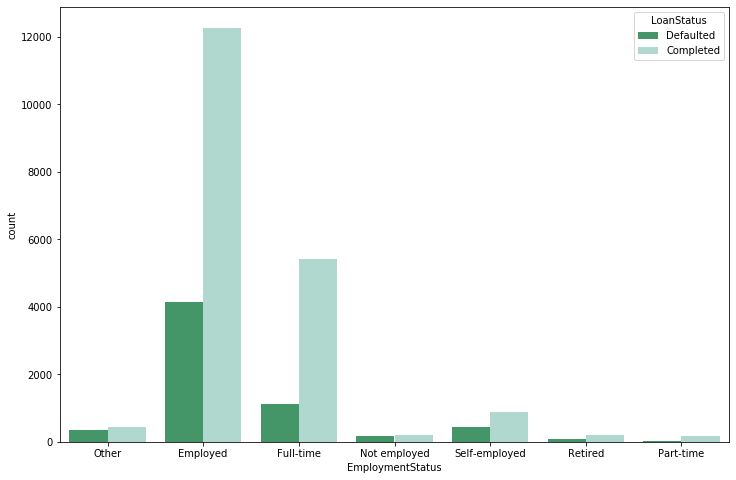

In [54]:
plt.figure(figsize = [12, 8])
sb.countplot(data=loan_subdata, x='EmploymentStatus', hue='LoanStatus', palette='BuGn_r');

Visually it seems that burrowers with employment status 'Not Employed' and 'Self-employed are more likely to default on credit. Next let's have a closer look at loan status and loan amount.

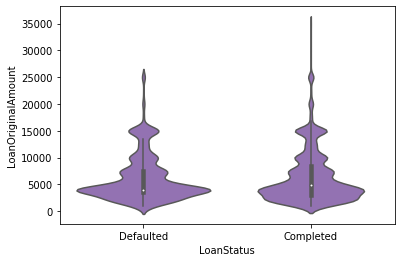

In [55]:
sb.violinplot(data = loan_subdata, x = 'LoanStatus', y = 'LoanOriginalAmount', color = default_color);

Defaulted credits tend to be smaller than completed. Next let's check Term and loan status.

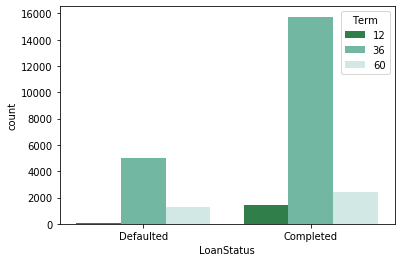

In [56]:
sb.countplot(data=loan_subdata, x='LoanStatus', hue='Term', palette='BuGn_r');

Highest proportion of defaulted credits is among loans with Term of 60 months. Now let's move unto figuring variables that influence Prosper rating of the client.

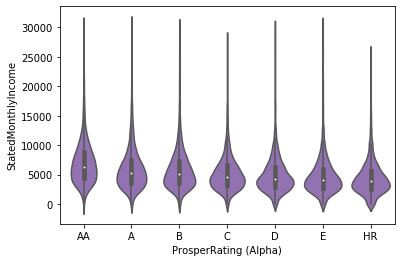

In [57]:
sb.violinplot(data = loan_subdata, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', color = default_color);

As expected, individuals with higher monthly income tend to have higher rating. Let's cjeck rating and number of investors:

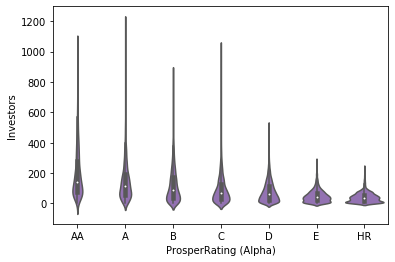

In [58]:
sb.violinplot(data = loan_subdata, x='ProsperRating (Alpha)', y='Investors', color = default_color);

Borrowers with higher ratings on average have more investors. Next let's check rating and total prosper loans:

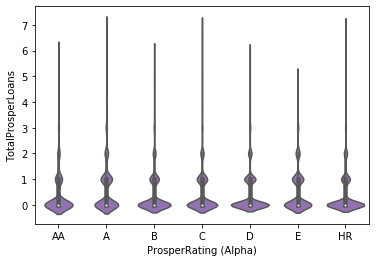

In [59]:
sb.violinplot(data = loan_subdata, x = 'ProsperRating (Alpha)', y = 'TotalProsperLoans', color = default_color);

There is no relation between prosper rating and number of prosper loans. Next let's check prosper rating and Employment status.

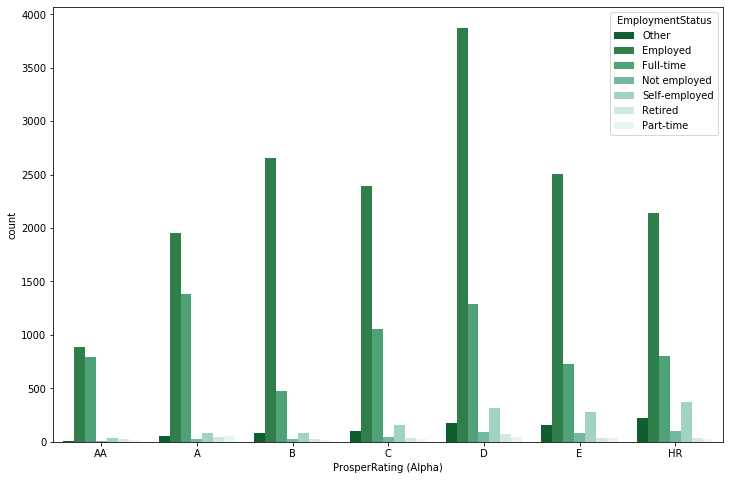

In [60]:
plt.figure(figsize = [12, 8])
sb.countplot(data = loan_subdata, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette='BuGn_r');

Lower ratings seem to have greater proportions of individuals with employment status <b>Not Employed, Self-employed, Retired and Part-Time</b>. Next let’s check number of delinquencies and rating.

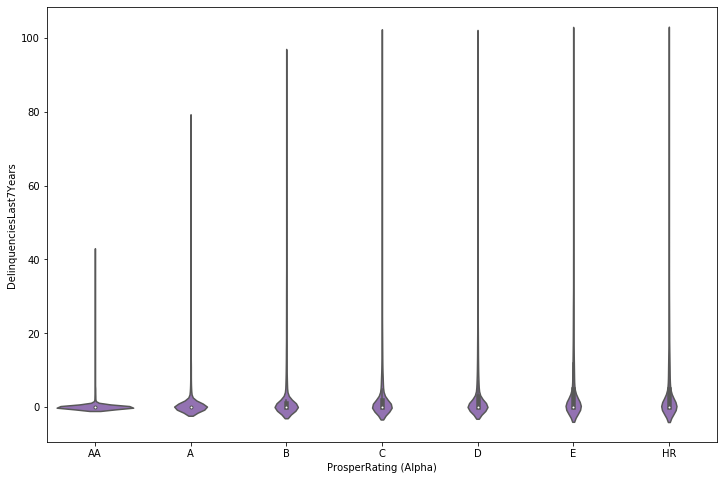

In [61]:
plt.figure(figsize = [12, 8])
sb.violinplot(data = loan_subdata, x = 'ProsperRating (Alpha)', y = 'DelinquenciesLast7Years', color = default_color);

Indivuduals with highest AA rating tend to have less delinquencies than others.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As expected default credits tend to be given to individuals with lower rating. Business and home improvement seems to be riskier categories. The borrower rate tends to be higher for defaulted credits. Long term (60 months) credits are riskier than short term (12 months). Borrower rate for individuals with low rating is higher. High monthly income corresponds to higher rating. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

One interesting thing I've observed is that prosper rating D is the most frequent rating among defaulted credits.

## Multivariate Exploration

Let's have a closer look on relationship between Term, Rate, Delinquencies, Monthly Income, Loan Amount and Loan Status.

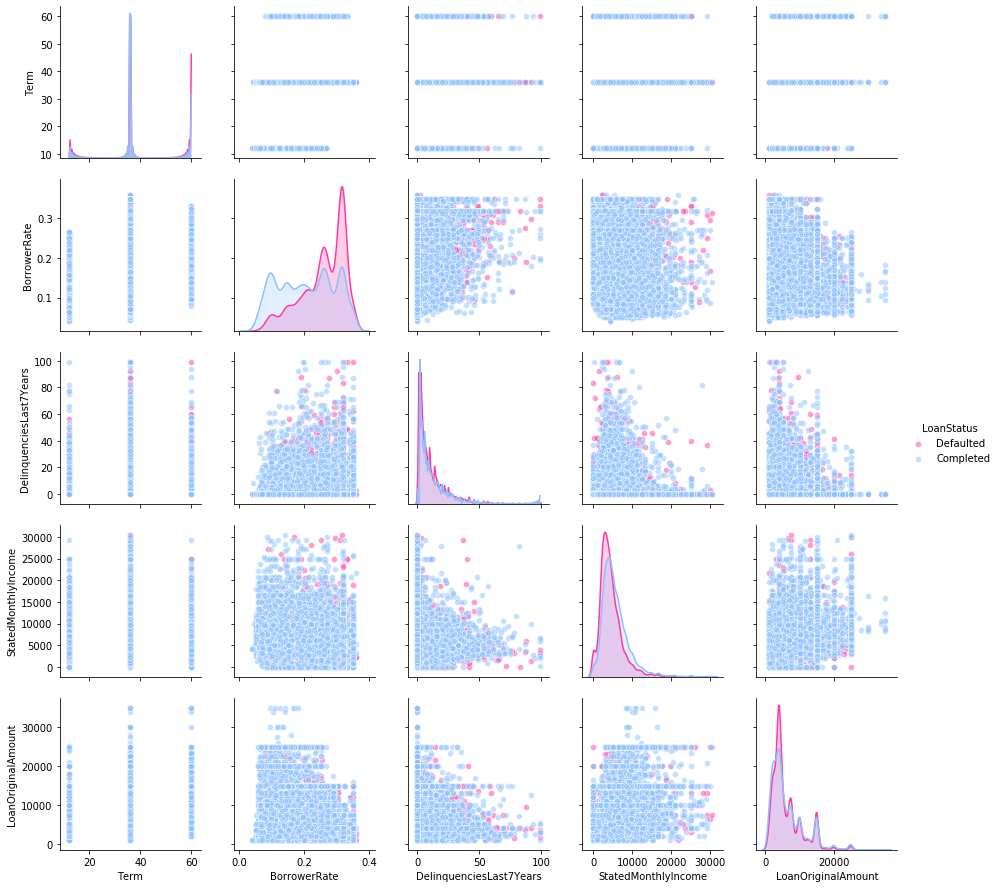

In [62]:
# extract and visualize the features of interest
cols = [
    'Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
    'LoanOriginalAmount', 'LoanStatus'
       ]
g = sb.pairplot(loan_subdata[cols], hue='LoanStatus',
                palette={'Defaulted': '#ff3ba0', 'Completed': '#8cc0ff'},
                plot_kws={'alpha': 0.5, 'edgecolor': 'white'})
fig = g.fig;

Among numeric variables Number of Delinquencies for last 7 years and Borrower Rate seem to be best predictor for outcome of the credit but in the previous section we have found that  both of them derivatives of credit rating. 

Next let's check on categorical variables, first let's see relationships between rating, loan amount and loan status:

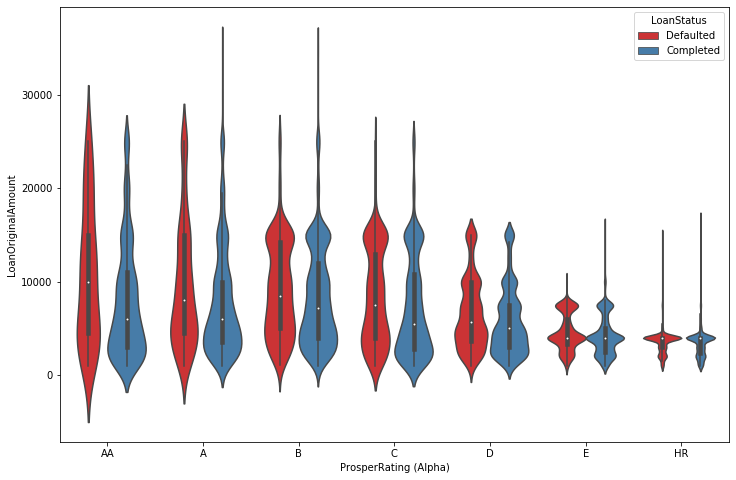

In [63]:
plt.figure(figsize = [12, 8])
sb.violinplot(data=loan_subdata, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus', palette="Set1");

Except for the lowest ratings defaulted credits tend to be larger than completed. At first glance this is at odds with what we've figured in previous section (defaulted credits tend to be smaller than completed), but most of the defaulted credits comes from individuals with low Prosper rating (they tend to borrow less) and this drives average amount of defaulted credit down. 

Let's check how amount, listing category loan and loan status interact:

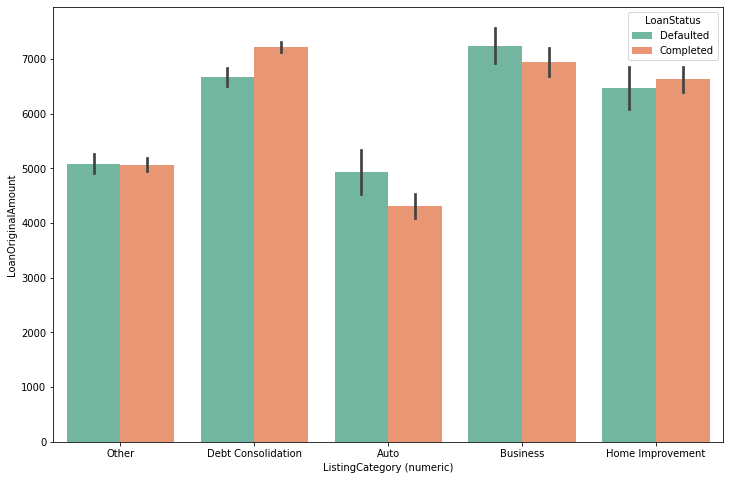

In [64]:
plt.figure(figsize = [12, 8])
sb.barplot(data=loan_subdata, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus', palette="Set2");

As we've found before Auto and Business categories are somewhat more prone to the defaulting and now we can see that business category tend to have larger amount. Let's have closer look at relationships between credit category, credit rating and outcome of credit.

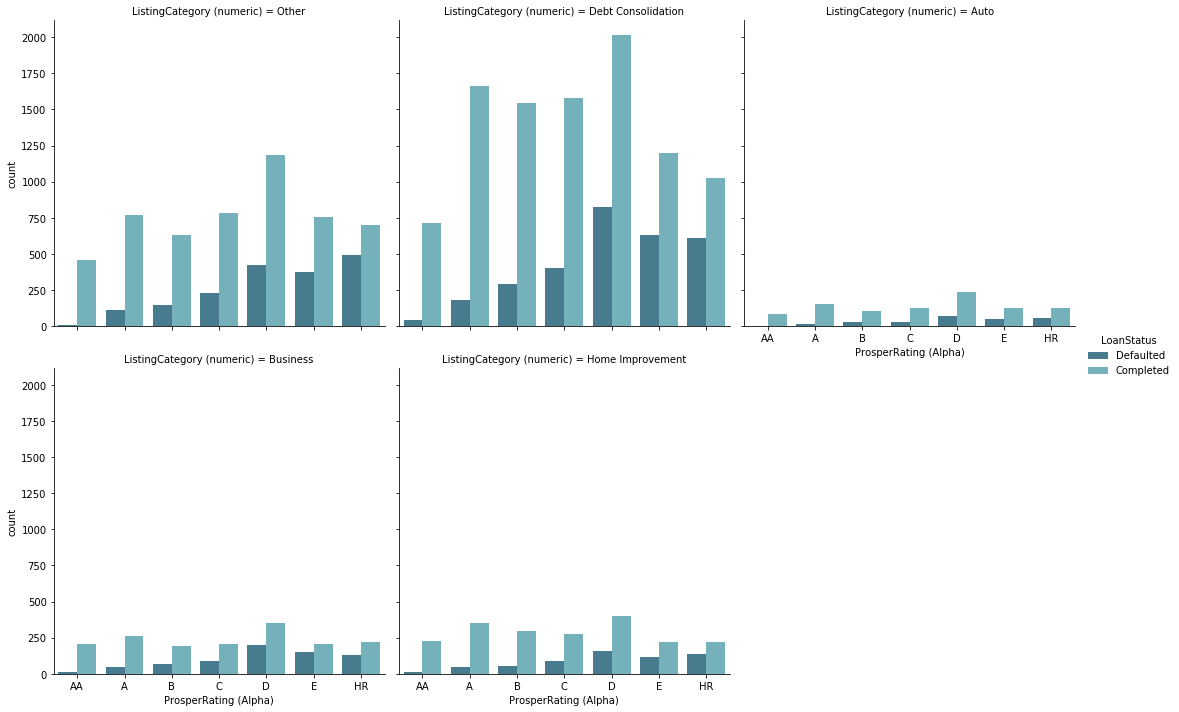

In [65]:
sb.catplot(x='ProsperRating (Alpha)', hue='LoanStatus', col='ListingCategory (numeric)',
              data=loan_subdata, kind='count', palette='GnBu_d', col_wrap=3
             );

It seems there is no substantial difference for default rates in different categories broken up by ratings. Let's check relationship between Term, Category and the outcome:

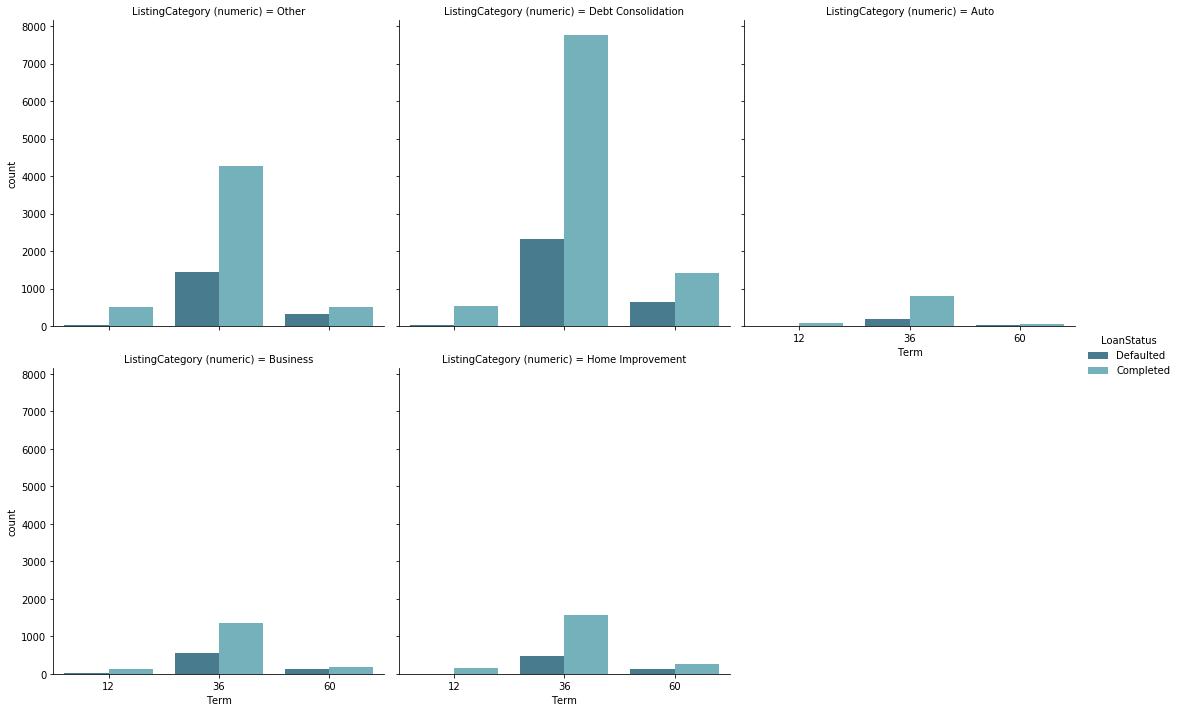

In [66]:
sb.catplot(x='Term', hue='LoanStatus', col='ListingCategory (numeric)',
              data=loan_subdata, kind='count', palette='GnBu_d', col_wrap=3
             );

We can see that long-term credits are especially risky for purposes Other, Business and Home Improvement. Next let's see relationship between Term, Rating and outcome of credit:

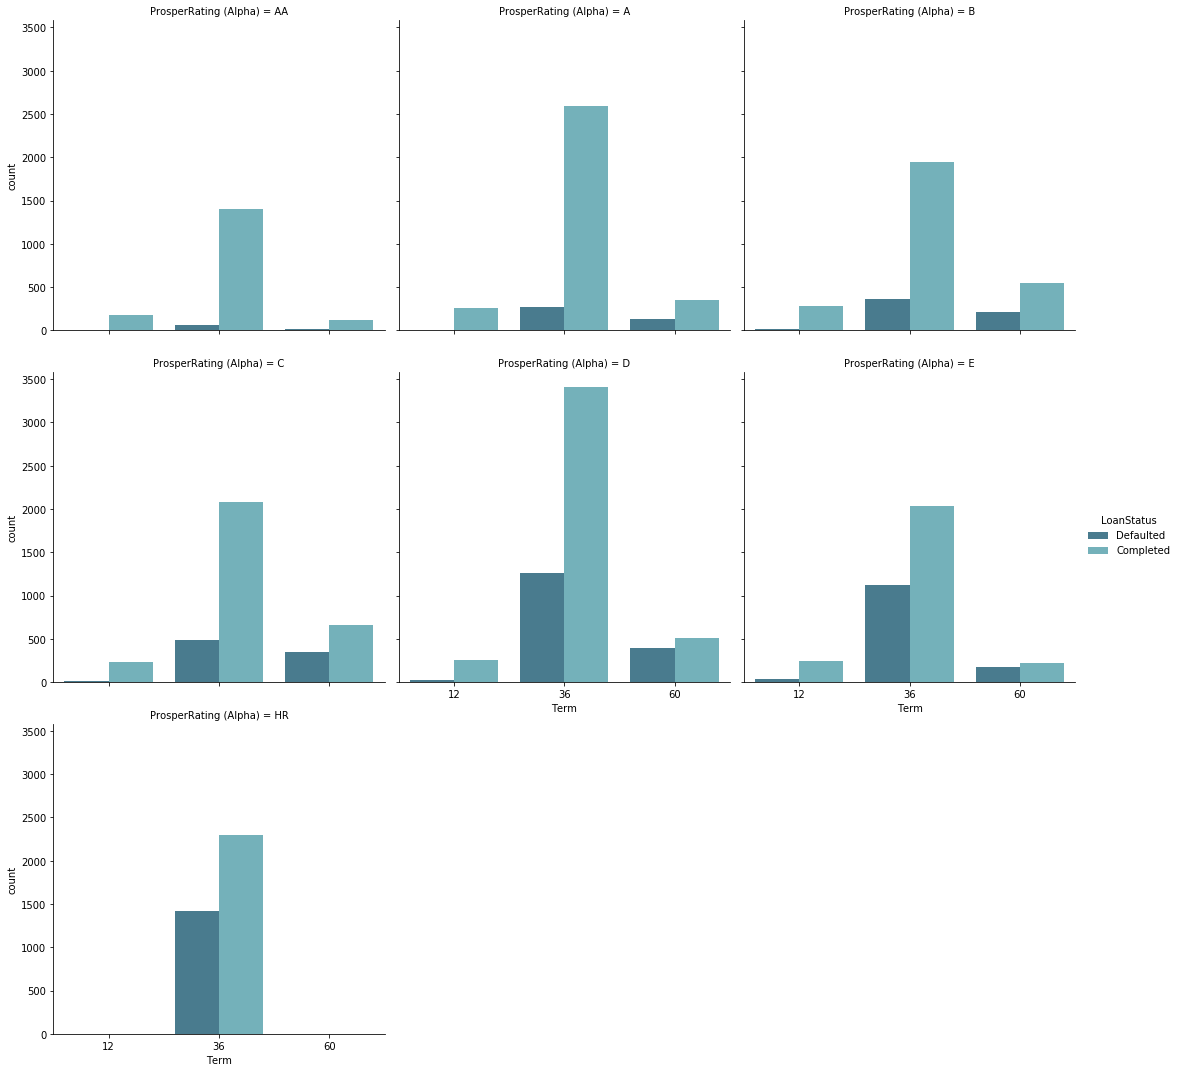

In [67]:
sb.catplot(x='Term', hue='LoanStatus', col='ProsperRating (Alpha)',
              data=loan_subdata, kind='count', palette='GnBu_d', col_wrap=3
             );

Long term (60 months) credit seems to be riskier than mid-term (36 months) or short-term (12 months). Interestingly enough there is no short-term or long-term credits for the lowest credit rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Our initial assumptions were strengthened. The outcome of credit depends on Prosper raing, Term, Employment status. Defaulted credits tend to be larger than completed for all ratings except the lowest ones. In terms of purposes of credits more default prone are other and business categories (business category also tend to have larger loans). Long term (60 months) loans are riskier than mid-term and short term.

### Were there any interesting or surprising interactions between features?

Interesting find was that defaulted credits for individuals with high Prosper ratings tend to be larger than completed credits. Another interesting find that individuals with lowerst rating (HR) have only mid-term (36 months) credits.